# COSC 2673/2793 | Machine Learning
## Isaac Lovison (s3937729) Assignment 1 Reporting your report content)


## Introduction
In this assingment we aim to predict the Life expectancy of a country uses various data points


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

health_train = pd.read_csv('train.csv') 
health_test = pd.read_csv('test.csv')
health_train.head()



,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.10,146,2017,0,263,262,264,62,0.01,71.28,1154,19.10,83,6,8.16,65.00,0.10,654.37,33736494,17.20,17.30,0.48,3.18
1,2,59.80,146,2016,0,271,278,264,64,0.01,73.52,492,18.60,86,58,8.18,62.00,0.10,686.22,327582,17.50,17.50,0.48,3.16
2,3,57.60,146,2015,0,268,246,290,66,0.01,73.22,430,18.10,89,62,8.13,64.00,0.10,707.55,31731688,17.70,17.70,0.47,3.15
3,4,55.50,146,2014,0,272,248,296,69,0.01,78.18,2787,17.60,93,67,8.52,67.00,0.10,750.35,3696958,17.90,18.00,0.46,3.13
4,5,57.70,146,2013,0,275,278,272,71,0.01,7.10,3013,17.20,97,68,7.87,68.00,0.10,71.16,2978599,18.20,18.20,0.45,3.08


# Attribute Descriptions

- **ID**: Row index (not an attribute)
- **TARGET-LifeExpectancy**: Life Expectancy in age (years)
- **Country**: Index of Country
- **Year**: Year
- **Status**: Developed or Developing status (0, 1)
- **AdultMortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **AdultMortality-Female**: Adult Mortality Rates of Female (probability of dying between 15 and 60 years per 1000 population)
- **AdultMortality-Male**: Adult Mortality Rates of Male (probability of dying between 15 and 60 years per 1000 population)
- **SLS**: Number of Short Life Span per 1000 population
- **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **PercentageExpenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **Measles**: Measles - number of reported cases per 1000 population
- **BMI**: Average Body Mass Index of entire population
- **Under5LS**: Number of under-five Life Span per 1000 population
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
- **TotalExpenditure**: General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- **HIV-AIDS**: Factor indicating between 0-4 years life span per 1000 HIV/AIDS
- **GDP**: Gross Domestic Product per capita (in USD)
- **Population**: Population of the country
- **Thinness1-19years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- **Thinness5-9years**: Prevalence of thinness among children for Age 5 to 9(%)
- **IncomeCompositionOfResources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling**: Schooling indicator
ng: Schooling indicator

## Describe
Using a basic describe function in order to get a understanding of all data points

In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)  
health_train.describe(include='all')





,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00,2071.00
mean,1036.00,69.27,95.36,2009.52,0.19,162.83,161.91,163.76,33.08,4.70,764.54,2095.75,37.53,45.89,82.73,5.88,82.75,1.63,7352.74,12037414.34,4.94,4.98,0.61,3.37
std,597.99,9.48,54.86,4.61,0.39,118.87,119.44,118.80,135.83,4.21,2081.88,9959.53,19.95,185.25,23.19,2.55,23.13,4.78,15219.98,63917966.25,4.70,4.79,0.22,0.59
min,1.00,37.30,0.00,2002.00,0.00,1.00,0.00,2.00,0.00,0.01,0.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.88,34.00,0.10,0.10,0.00,0.00
25%,518.50,63.00,50.00,2006.00,0.00,74.00,74.00,74.00,0.00,0.61,5.85,0.00,18.70,0.00,77.00,4.19,78.00,0.10,413.73,127445.00,1.60,1.50,0.46,3.07
50%,1036.00,71.20,94.00,2010.00,0.00,144.00,142.00,144.00,3.00,3.83,69.02,19.00,42.00,4.00,93.00,5.64,93.00,0.10,1410.67,652231.00,3.20,3.30,0.66,3.45
75%,1553.50,76.00,144.00,2014.00,0.00,228.00,228.00,230.00,22.00,7.84,430.19,427.00,55.90,27.00,97.00,7.43,97.00,0.80,5811.30,5371104.00,7.40,7.40,0.77,3.74
max,2071.00,92.70,192.00,2017.00,1.00,699.00,704.00,722.00,1800.00,17.87,19479.91,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,133473.47,1293859294.00,27.70,28.60,0.95,4.38


- checking for any Null Values
- Count of 2071 for all values. Means no Null Values

In [24]:
health_train.info()

#this is a common step to perform trying to see if their is any null values however their were none in this data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

In [ ]:
## checking for any Duplicate Values
As you can see many have Duplicate Values
However main ones which stand out include
-Population: as such a large number unlikely to have so

In [25]:
health_train.nunique()

ID                              2071
TARGET_LifeExpectancy            424
Country                          136
Year                              16
Status                             2
AdultMortality                   383
AdultMortality-Male              255
AdultMortality-Female            255
SLS                              180
Alcohol                          915
PercentageExpenditure           1665
Measles                          758
BMI                              557
Under5LS                         216
Polio                             70
TotalExpenditure                 745
Diphtheria                        78
HIV-AIDS                         163
GDP                             1772
Population                      1624
Thinness1-19years                197
Thinness5-9years                 200
IncomeCompositionOfResources     596
Schooling                        160
dtype: int64

In [26]:
common_population = health_train['Population'].value_counts().head()
common_gdp = health_train['GDP'].value_counts().head()
common_percentage_expenditure = health_train['PercentageExpenditure'].value_counts().head()
common_IncomeCompositionOfResources = health_train['IncomeCompositionOfResources'].value_counts().head()
common_Schooling  = health_train['Schooling'].value_counts().head()

print(common_percentage_expenditure)
print(common_population)
print(common_gdp)
print(common_Schooling)
print(common_IncomeCompositionOfResources)

PercentageExpenditure
0.00     407
71.28      1
37.83      1
42.53      1
46.58      1
Name: count, dtype: int64
Population
127445     439
1981886      4
444          4
718239       2
292          2
Name: count, dtype: int64
GDP
413.73     274
1309.27      8
3345.41      4
315.94       4
3844.05      4
Name: count, dtype: int64
Schooling
3.07    125
3.54     38
3.59     36
3.42     36
3.45     35
Name: count, dtype: int64
IncomeCompositionOfResources
0.46    122
0.00    108
0.70     13
0.74     11
0.64      9
Name: count, dtype: int64


In [27]:
import pandas as pd

# Assuming health_train is your DataFrame and it's already loaded with data

# Define the erroneous values
erroneous_population_value = 127445
erroneous_gdp_value = 413.73
erroneous_percentage_expenditure = 0
erroneous_income_composition_values = [0.46, 0.00]
erroneous_schooling_value = 3.07

# Calculate the median values for each column, excluding the erroneous values
median_population = health_train.loc[health_train['Population'] != erroneous_population_value, 'Population'].median()
median_gdp = health_train.loc[health_train['GDP'] != erroneous_gdp_value, 'GDP'].median()
median_percentage_expenditure = health_train.loc[health_train['PercentageExpenditure'] != erroneous_percentage_expenditure, 'PercentageExpenditure'].median()
median_schooling = health_train.loc[health_train['Schooling'] != erroneous_schooling_value, 'Schooling'].median()
median_income_composition = health_train.loc[~health_train['IncomeCompositionOfResources'].isin(erroneous_income_composition_values), 'IncomeCompositionOfResources'].median()

# Replace the erroneous values with the median values
health_train['Population'] = health_train['Population'].replace(erroneous_population_value, median_population)
health_train['GDP'] = health_train['GDP'].replace(erroneous_gdp_value, median_gdp)
health_train['PercentageExpenditure'] = health_train['PercentageExpenditure'].replace(erroneous_percentage_expenditure, median_percentage_expenditure)
health_train['Schooling'] = health_train['Schooling'].replace(erroneous_schooling_value, median_schooling)

for erroneous_value in erroneous_income_composition_values:
    health_train['IncomeCompositionOfResources'] = health_train['IncomeCompositionOfResources'].replace(erroneous_value, median_income_composition)




In [28]:
import pandas as pd

# Assuming 'health_train' is your DataFrame and it's already loaded with data
countries_of_interest = [46, 2]

# Set display options for better DataFrame visualization
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# Specify the columns you're interested in
selected_columns = ['Country', 'Year', 'Population', 'PercentageExpenditure', 'GDP']

# Create a dictionary to hold the data for each country
country_dataframes = {}

# Filter and store each country's data in the dictionary
for country in countries_of_interest:
    country_data = health_train[health_train['Country'] == country][selected_columns]
    country_dataframes[country] = country_data.reset_index(drop=True)

# Concatenate the country data side by side, ensuring the values are DataFrames
df_side_by_side = pd.concat([df for df in country_dataframes.values()], axis=1)

# Display the concatenated DataFrame
print(df_side_by_side)



    Country  Year  Population  PercentageExpenditure      GDP  Country  Year  Population  PercentageExpenditure      GDP
0        46  2017     1514464                 154.34 17424.78        2  2017    11274196                 154.34  4879.70
1        46  2016     1514464                 294.91 17202.83        2  2016      112957                7163.35 53132.12
2        46  2015     1514464                 263.04 17329.52        2  2015    11182817                 702.36  5209.55
3        46  2014     1514464                 260.00 17231.06        2  2014    11128246                 664.47  5011.52
4        46  2013     1514464                 173.98 17398.26        2  2013     1147744                 713.53  5345.51
5        46  2012     1514464                 154.96  1787.42        2  2012     1895586                 665.74  4970.83
6        46  2011     1514464                 327.16 18506.12        2  2011     1796493                 671.94  5027.19
7        46  2010     1514464   

In [47]:
# Copy the DataFrame to avoid altering the original one directly
health_train_reduced = health_train.copy()

# Define the number of top outliers to remove for each column
outliers_to_remove = {
    'SLS': 15,
    'Under5LS': 15,
    'Measles': 45,
    'GDP':35,
    'Population': 35,
    'HIV-AIDS': 40,
    # 'PercentageExpenditure': 10,  # Uncomment if you decide to include it
}

# Iterate through each column and mark the top N outliers for removal
rows_to_remove = set()
for column, top_n in outliers_to_remove.items():
    # Find the indices of the top N values for the current column
    top_outliers_indices = health_train_reduced[column].nlargest(top_n).index
    # Add these indices to the set of rows to remove
    rows_to_remove.update(top_outliers_indices)

# Now remove all rows that have been marked as outliers
health_train_reduced = health_train_reduced.drop(index=list(rows_to_remove))

# Optionally, sort the DataFrame by index if desired
health_train_reduced = health_train_reduced.sort_index()

# Show some results

print(f"Size before removal: {health_train.shape[0]}")
print(f"Size after removal: {health_train_reduced.shape[0]}")

Size before removal: 2071
Size after removal: 1923


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'health_train' is your original DataFrame loaded with data

# Define the columns to exclude
columns_to_exclude = ['ID', 'Life expectancy', 'Country', 'Year', 'Status']
# Create a reduced DataFrame by excluding the specified columns
health_train_reduced = health_train.drop(columns=columns_to_exclude)

# Now proceed with your plotting code

# Calculate the number of rows needed based on the number of columns
num_columns = len(health_train_reduced.columns)
num_rows = num_columns // 5 + (num_columns % 5 > 0)  # Adds an extra row if there are any remainder columns

# Create a figure to accommodate the subplots for box plots
# Adjust the figsize to fit all subplots nicely
plt.figure(figsize=(20, num_rows * 4))  # Adjust height dynamically based on the number of rows

# Create a box plot for each of the selected columns
for i, col in enumerate(health_train_reduced.columns):
    ax = plt.subplot(num_rows, 5, i + 1)  # Adjust the grid dimensions dynamically
    sns.boxplot(y=health_train_reduced[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



KeyError: "['Life expectancy'] not found in axis"

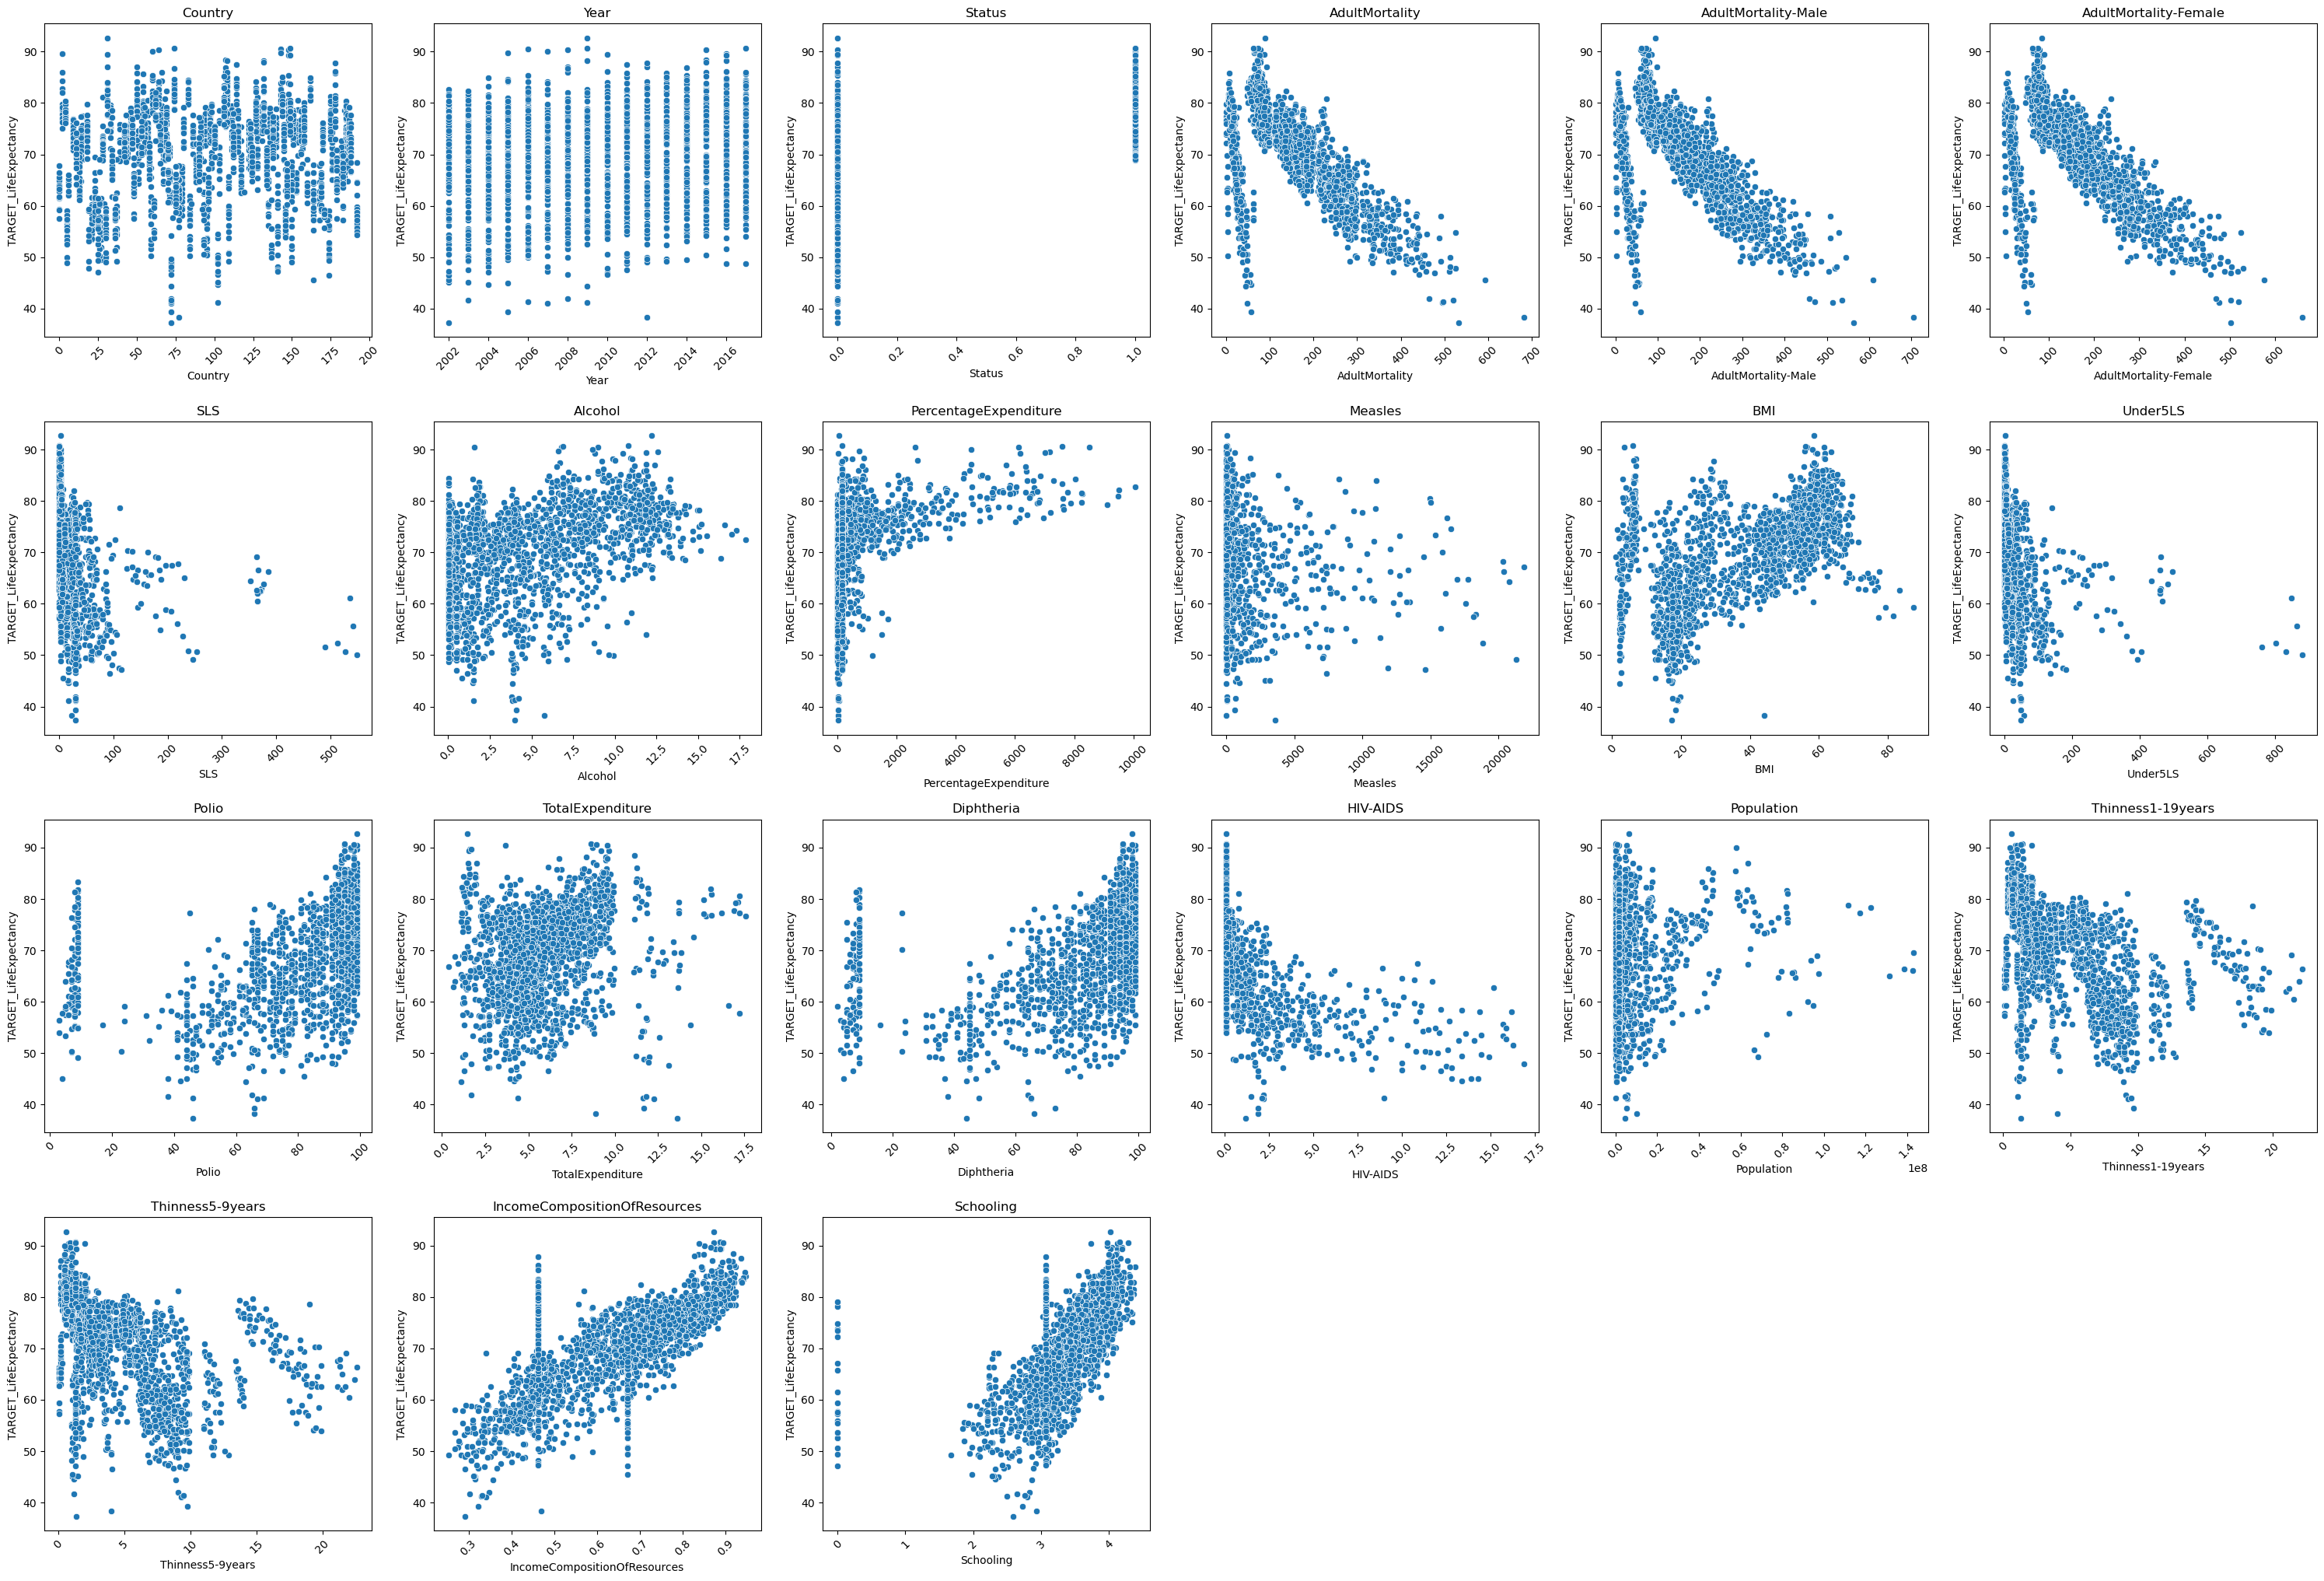

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figure size to better fit a 5x6 grid. You might need to tweak these dimensions based on your display.
plt.figure(figsize=(30, 25))  # Adjusted to provide more space for the additional row of plots

# Assuming 'health_train_reduced' is your DataFrame
# Filter out the columns you don't want to plot
columns_to_plot = [col for col in health_train_reduced.columns if col not in ['LifeExpectancy', 'ID', 'TARGET_LifeExpectancy',  'GDP'
                                                                             ]]

# Given the adjustments, you may now plot up to 30 (5x6) columns.
for i, col in enumerate(columns_to_plot):
    if i < 30:  # Updated to accommodate up to 30 plots
        plt.subplot(5, 6, i + 1)  # Adjust the grid to 5x6
        sns.scatterplot(data=health_train_reduced, x=col, y='TARGET_LifeExpectancy')
        plt.title(col)
        plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap, adjust angle as needed

plt.tight_layout()  # Adjust layout to make room for title and x-axis labels
plt.show()



Based on the scatter plots provided, we can group the variables into categories of correlation strength and type. Let's organize them:

High Correlation
These variables show a strong correlation with life expectancy, indicated by a clear trend in the scatter plot:

Negative Correlation:

Adult Mortality (Overall, Male, Female): All show a strong negative correlation; as mortality increases, life expectancy decreases.
HIV-AIDS: High prevalence of HIV/AIDS corresponds to a significant decrease in life expectancy.
Positive Correlation:

BMI: Up to a certain point, higher BMI is associated with higher life expectancy, which then plateaus.
Polio and Diphtheria: Immunization coverage rates for polio and diphtheria have a strong positive correlation with life expectancy; higher coverage leads to higher life expectancy.
IncomeCompositionOfResources: A higher human development index shows a positive correlation with higher life expectancy.
Moderate Correlation
These variables show a moderate correlation with life expectancy, with some level of scatter in the plot that does not form as clear of a pattern as the high correlation group:

Negative Correlation:

Under5LS: More under-five deaths correspond to lower life expectancy, although there are some data points that do not follow the overall trend.
Positive Correlation:

PercentageExpenditure: There is a moderate positive correlation with some plateauing, indicating that as health expenditure increases, life expectancy rises up to a point.
Low or Unclear Correlation
These variables have a less discernible pattern or relationship with life expectancy:

Measles: There's a cluster of points at the lower end, with no clear trend, suggesting a low or unclear correlation.
TotalExpenditure: The data is widely scattered with no clear trend, suggesting a low or unclear correlation.
GDP: While there's a trend of rising life expectancy with GDP, there is a lot of scatter, especially at higher GDP levels.
Population: The points are widely dispersed with no clear pattern, indicating no clear correlation.
Special Note
Alcohol: This variable was not plotted in the provided graphs, but based on your data, zero values are prevalent. If plotted, it could show a moderate to high positive correlation, where moderate alcohol consumption is often associated with higher life expectancy, but this would need to be confirmed by a plot.
Measles and Population: The banding effect in these plots suggests the need to investigate the data quality or reporting standards.
When interpreting these plots, remember that correlation does not imply causation. Each of these factors could be influenced by a variety of underlying conditions and could also be interrelated. Furthermore, some of these variables might better fit non-linear models or require transformation for a more accurate depiction of their relationship with life expectancy.

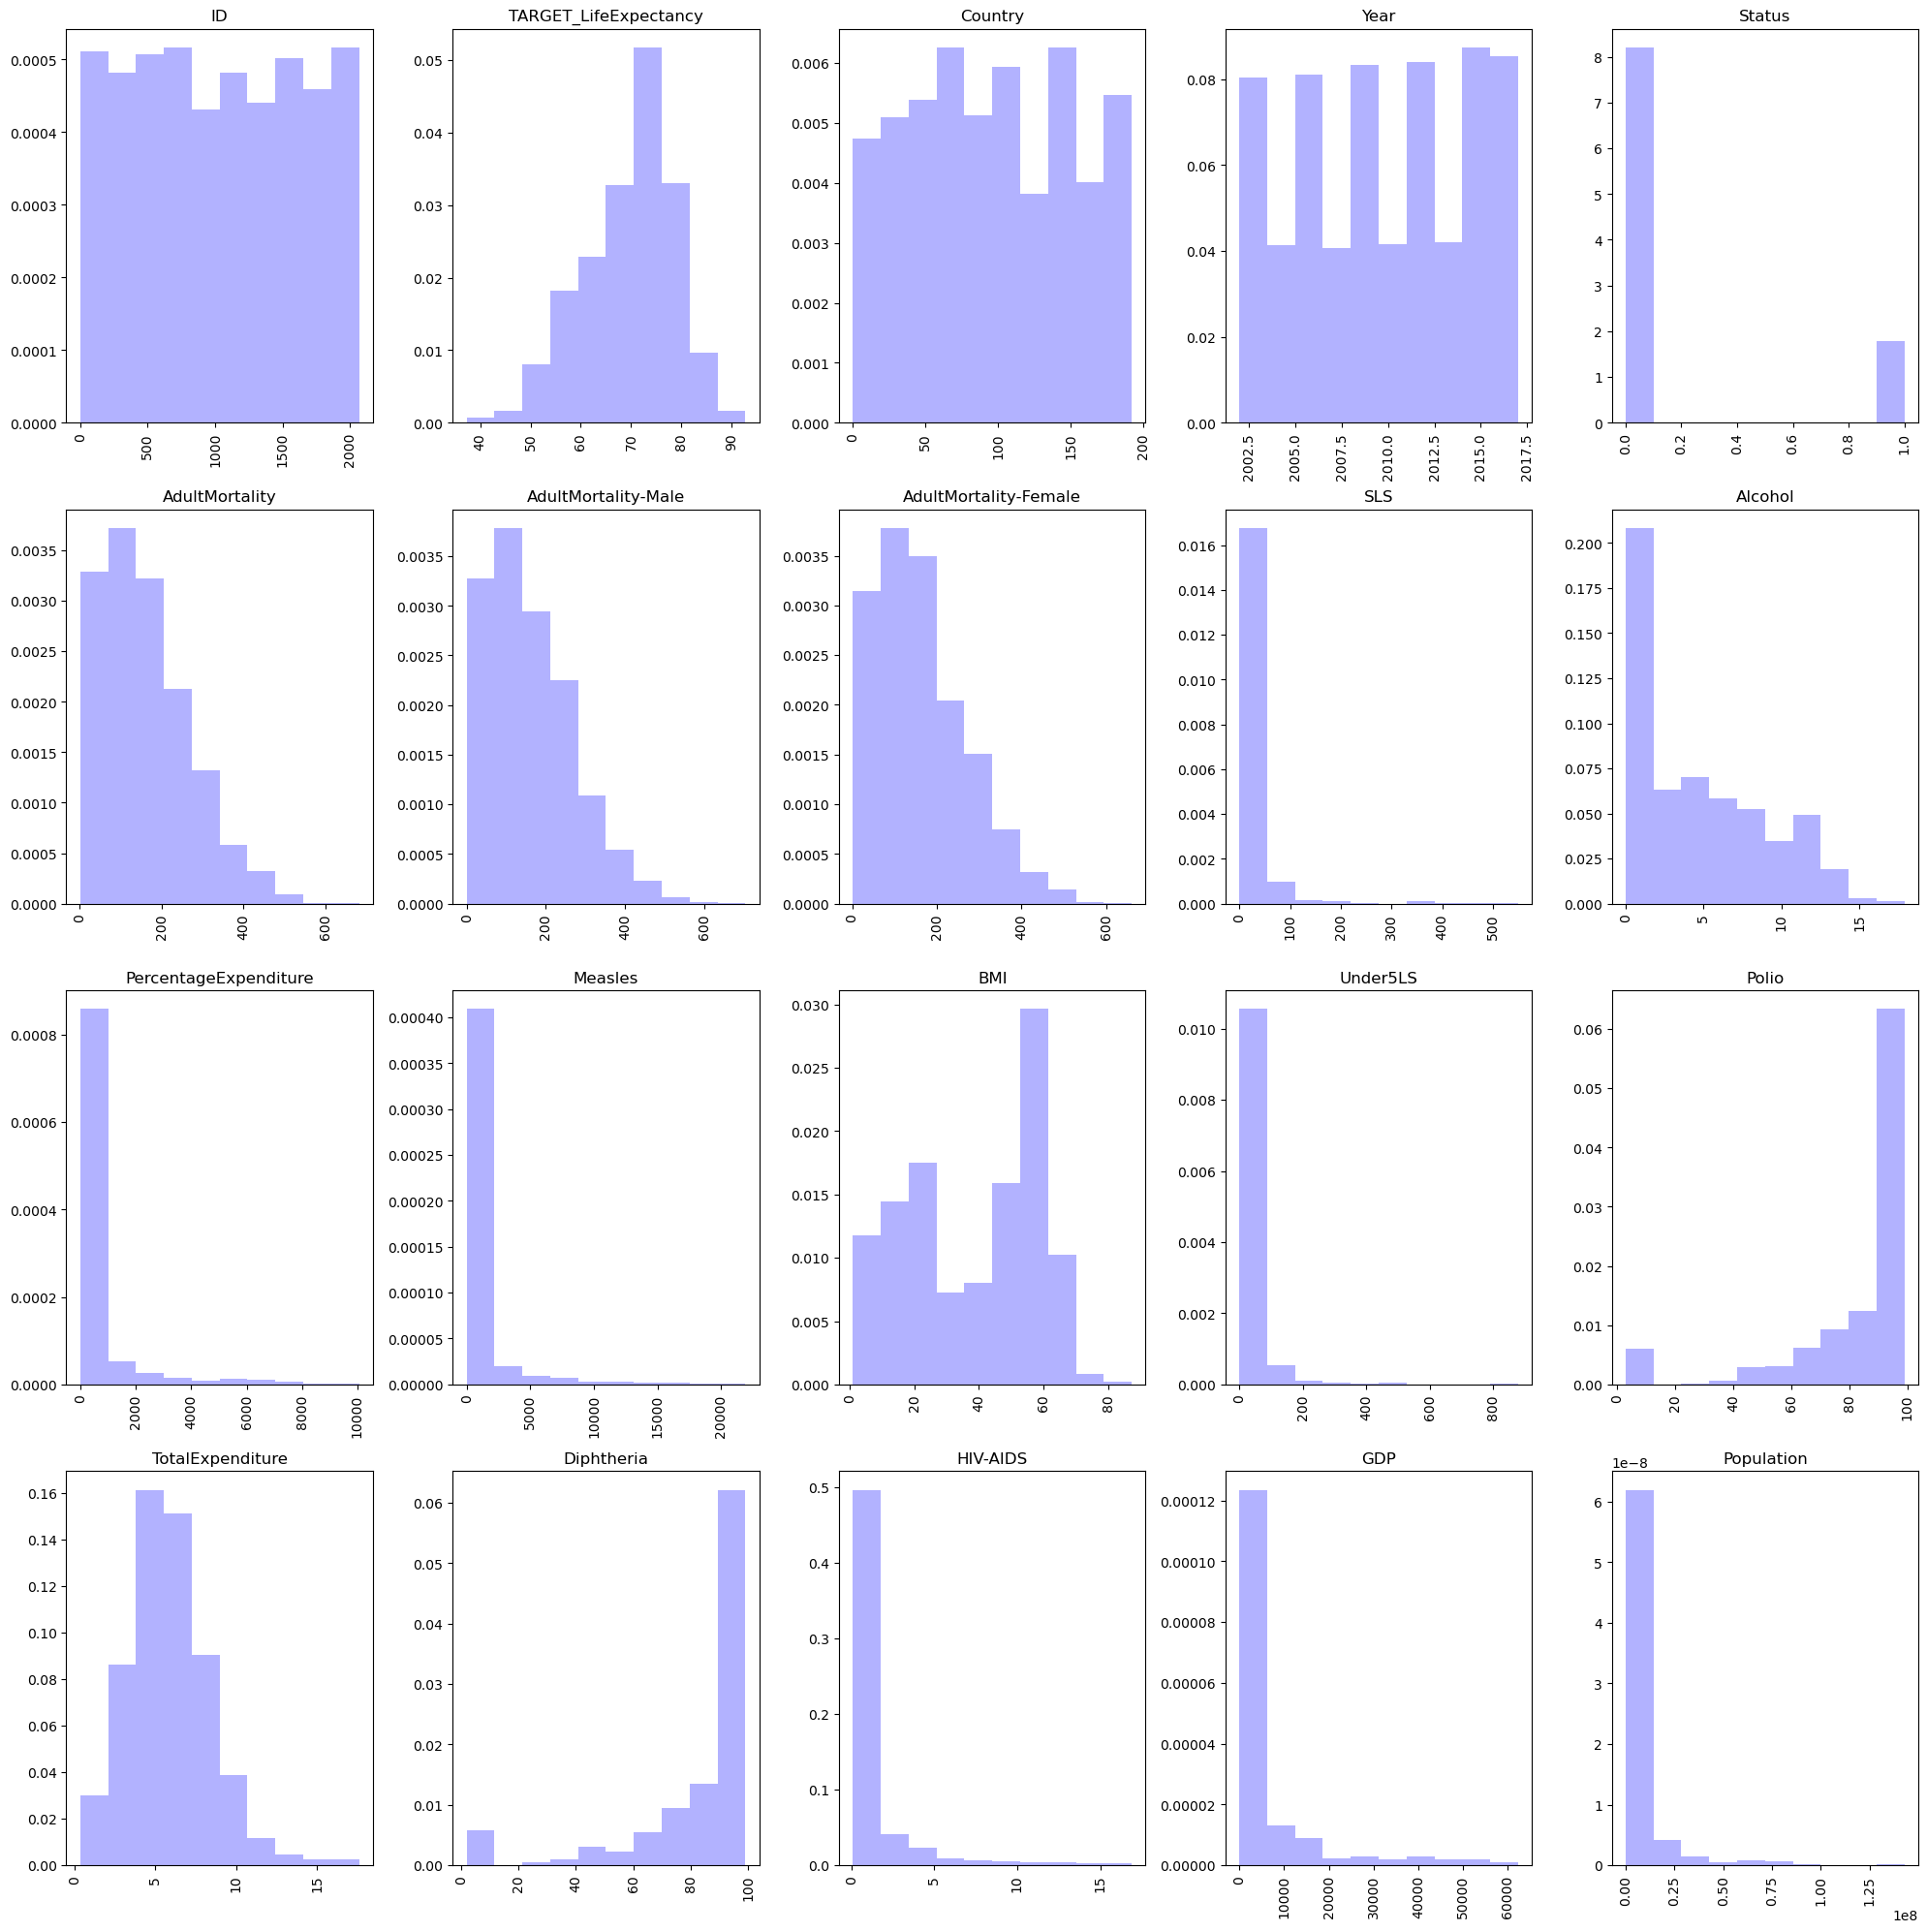

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming health_train_reduced is already loaded with the dataset
# If not, you would load it here with something like:
# health_train_reduced = pd.read_csv('path_to_your_file.csv')

plt.figure(figsize=(20, 20))

# Adjust the following line if you want to plot specific columns or a subset
columns_to_plot = health_train_reduced.columns[:20]  # Adjust to plot the first 20 columns

for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 5, i+1)
    plt.hist(health_train_reduced[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.tight_layout()  # This will adjust subplots to fit into the figure area.
plt.show()



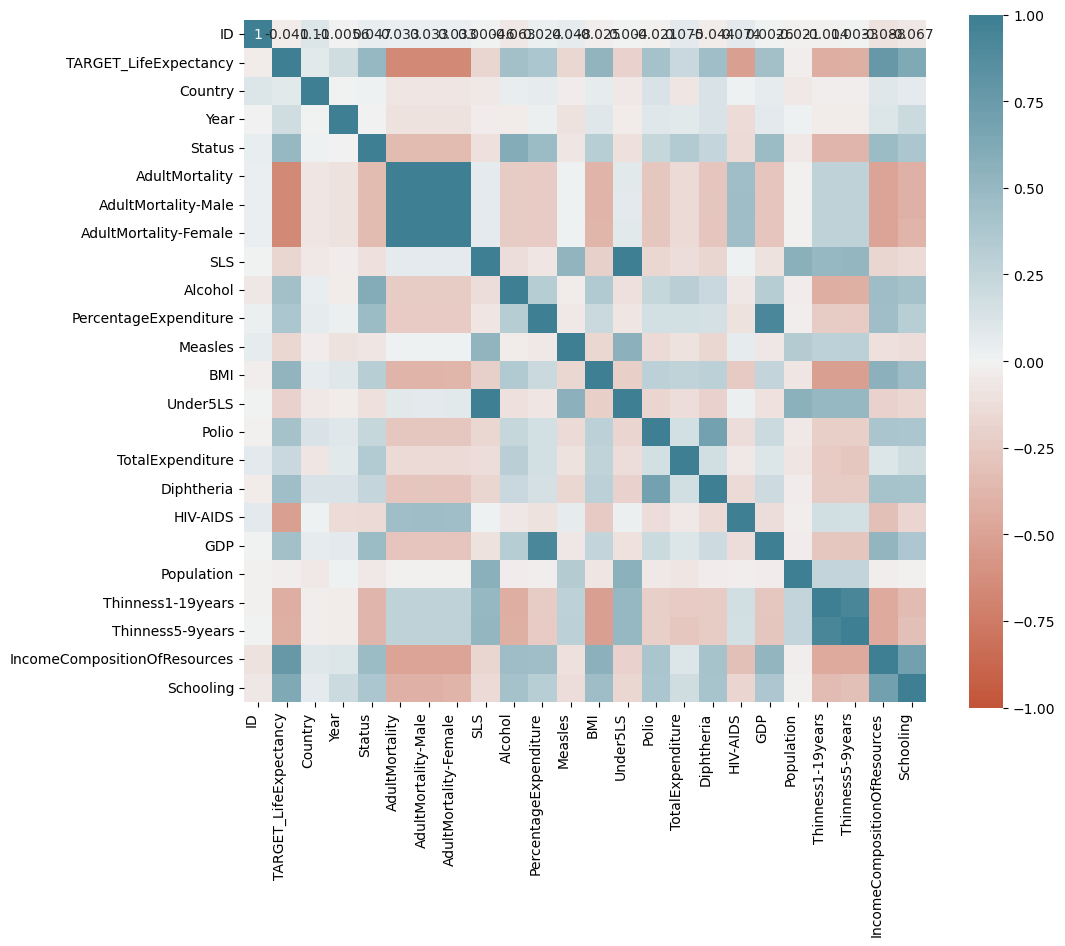

In [20]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = health_train_reduced.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

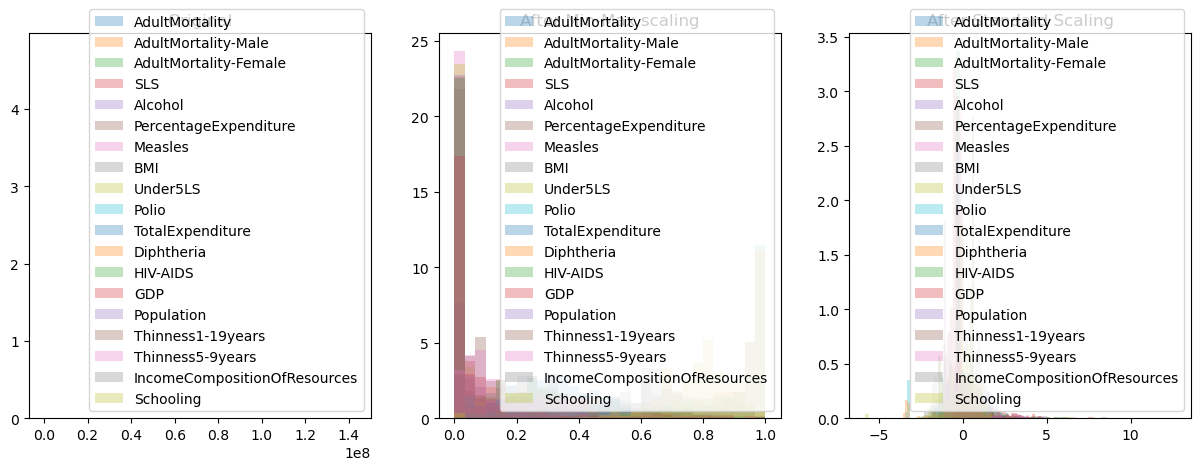

Validation Mean Squared Error: 19.413037202703915
Validation R^2 Score: 0.7737536117942033


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Country
- ID
- Status
- Year


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume health_train_reduced and health_test are defined elsewhere

# Split the Training Data
X = health_train_reduced.drop('TARGET_LifeExpectancy', axis=1)
y = health_train_reduced['TARGET_LifeExpectancy']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
exclude_columns = ['ID', 'TARGET_LifeExpectancy', 'Country', 'Year', 'Status']

# Get numeric columns for scaling
numeric_columns = [col for col in X_train.columns if col not in exclude_columns]

# Feature Scaling
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max scaling
X_train_minmax = min_max_scaler.fit_transform(X_train[numeric_columns])
X_val_minmax = min_max_scaler.transform(X_val[numeric_columns])

# Apply Standard scaling
X_train_standard = standard_scaler.fit_transform(X_train[numeric_columns])
X_val_standard = standard_scaler.transform(X_val[numeric_columns])

# Visualize the original, Min-Max scaled, and Standard scaled distributions
plt.figure(figsize=(15, 5))

# Plot original distribution
plt.subplot(1, 3, 1)
for col in numeric_columns:
    plt.hist(X_train[col], bins=30, alpha=0.3, density=True, label=col)
plt.title("Original")
plt.legend()

# Plot Min-Max scaled distribution
plt.subplot(1, 3, 2)
for i, col in enumerate(numeric_columns):
    plt.hist(X_train_minmax[:, i], bins=30, alpha=0.3, density=True, label=col)
plt.title("After Min-Max scaling")
plt.legend()

# Plot Standard scaled distribution
plt.subplot(1, 3, 3)
for i, col in enumerate(numeric_columns):
    plt.hist(X_train_standard[:, i], bins=30, alpha=0.3, density=True, label=col)
plt.title("After Standard Scaling")
plt.legend()

plt.show()

# Rest of the code for model training, validation, and prediction remains unchanged

# Train the Model
model = LinearRegression()
model.fit(X_train_standard, y_train)

# Validate the Model
y_val_pred = model.predict(X_val_standard)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print out validation results
print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation R^2 Score: {val_r2}')

# Prepare the 'health_test' set in the same way
health_test_scaled = standard_scaler.transform(health_test)

# Predict on the Test Set
health_test_predictions = model.predict(health_test_scaled)




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the Training Data
X = health_train_reduced.drop('TARGET_LifeExpectancy', axis=1)
y = health_train_reduced['TARGET_LifeExpectancy']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
COLUMN_TO_SCALE = 'COLUMN_NAME_TO_SCALE'  # Specify the column name you want to scale
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train[[COLUMN_TO_SCALE]])
X_val_minmax = min_max_scaler.transform(X_val[[COLUMN_TO_SCALE]])

# Apply Standard scaling
X_train_standard = standard_scaler.fit_transform(X_train[[COLUMN_TO_SCALE]])
X_val_standard = standard_scaler.transform(X_val[[COLUMN_TO_SCALE]])

# Visualize the original, Min-Max scaled, and Standard scaled distributions




# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)




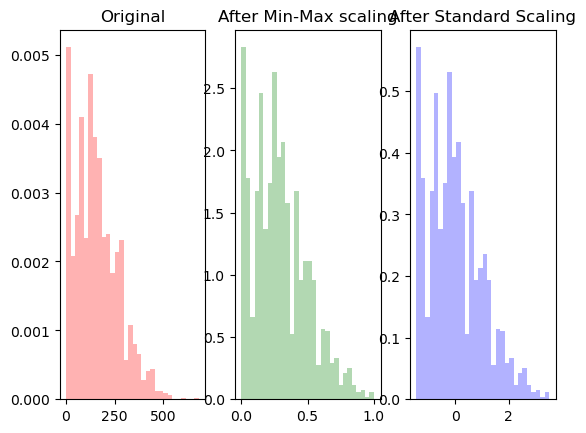

In [66]:
# Plot original distribution
plt.subplot(1, 3, 1)
plt.hist(health_train_reduced[numeric_columns[0]], bins=30, alpha=0.3, color='r', density=True)
plt.title("Original")

# Plot Min-Max scaled distribution
plt.subplot(1, 3, 2)
plt.hist(X_train_minmax[:, 0], bins=30, alpha=0.3, color='g', density=True)
plt.title("After Min-Max scaling")

# Plot Standard scaled distribution
plt.subplot(1, 3, 3)
plt.hist(X_train_standard[:, 0], bins=30, alpha=0.3, color='b', density=True)
plt.title("After Standard Scaling")

plt.show()


In [ ]:
# Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Validate the Model
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print out validation results
print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation R^2 Score: {val_r2}')

# If you decide to train on the full 'health_train_reduced' dataset:
X_full_scaled = scaler.fit_transform(X)
model.fit(X_full_scaled, y)

# Prepare the 'health_test' set in the same way
health_test_scaled = scaler.transform(health_test)

# Predict on the Test Set
# health_test_predictions = model.predict(health_test_scaled)

# Normally, you would evaluate model accuracy on a test set with known targets.
# Since 'health_test' does not have 'TARGET_LifeExpectancy', we cannot calculate accuracy metrics.
# If you have another way to evaluate predictions (e.g., submission to a competition), use that.

In [54]:
# Generate predictions for the test set
health_test_predictions = model.predict(health_test_scaled)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'ID': health_test['ID'],  # Or whatever the ID column is
    'TARGET_LifeExpectancy': health_test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [42]:
health_train_reduced.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1032.86,69.49,95.55,2009.55,0.18,161.13,160.17,162.10,21.37,4.69,709.77,1209.81,37.88,30.04,82.88,5.89,82.94,1.29,7006.24,8007761.12,4.75,4.77,0.65,3.37
std,601.85,9.25,54.63,4.62,0.39,114.06,114.45,114.16,58.41,4.22,1669.89,3989.49,19.96,85.13,23.24,2.56,23.14,3.11,12914.75,21774713.40,4.27,4.33,0.16,0.59
min,1.00,37.30,0.00,2002.00,0.00,1.00,0.00,2.00,0.00,0.01,0.10,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.88,34.00,0.10,0.10,0.25,0.00
25%,509.75,63.20,50.75,2006.00,0.00,76.00,74.00,76.00,0.00,0.60,52.28,0.00,18.90,0.00,77.00,4.17,78.00,0.10,630.00,462542.75,1.60,1.50,0.49,3.07
50%,1032.50,71.40,94.00,2010.00,0.00,143.50,142.00,144.00,3.00,3.81,154.34,17.00,43.00,4.00,94.00,5.65,93.00,0.10,1984.18,1514464.00,3.20,3.20,0.67,3.46
75%,1555.25,76.00,144.00,2014.00,0.00,228.00,228.00,228.50,20.00,7.88,428.18,373.50,56.10,25.00,97.00,7.43,97.00,0.80,5809.66,4941125.50,7.20,7.30,0.77,3.74
max,2071.00,92.70,192.00,2017.00,1.00,682.00,704.00,660.00,571.00,17.87,14714.83,52852.00,87.30,928.00,99.00,17.60,99.00,24.20,78033.17,186917361.00,22.20,22.60,0.95,4.38


In [ ]:








































































































f

In [ ]:
plt.figure(figsize=(20,20))

# Enumerate over the columns excluding the target variable
for i, col in enumerate(health_train_scaled.columns.drop('TARGET_LifeExpectancy')):
    plt.subplot(4, 5, i+1)
    plt.hist(health_train_scaled[col], alpha=0.3, color='b', density=True)
    # Check if the column exists in the test set before trying to plot it
    if col in health_test_scaled.columns:
        plt.hist(health_test_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate summary statistics for the BMI column
bmi_stats = health_train['BMI'].describe()

# Output the summary statistics
print("Summary Statistics for BMI:")
print(bmi_stats)

# Filter for BMI values that are greater than 50
high_bmi = health_train[health_train['BMI'] > 50]

# Display the records with unusually high BMI
print("\nRecords with BMI over 50:")
print(high_bmi[['Country', 'Year', 'BMI']])



In [ ]:
# Create a boxplot for the BMI data
plt.figure(figsize=(10, 6))
sns.boxplot(health_train['Population'])
plt.title('Boxplot of BMI Data')
plt.xlabel('Population')
plt.show()

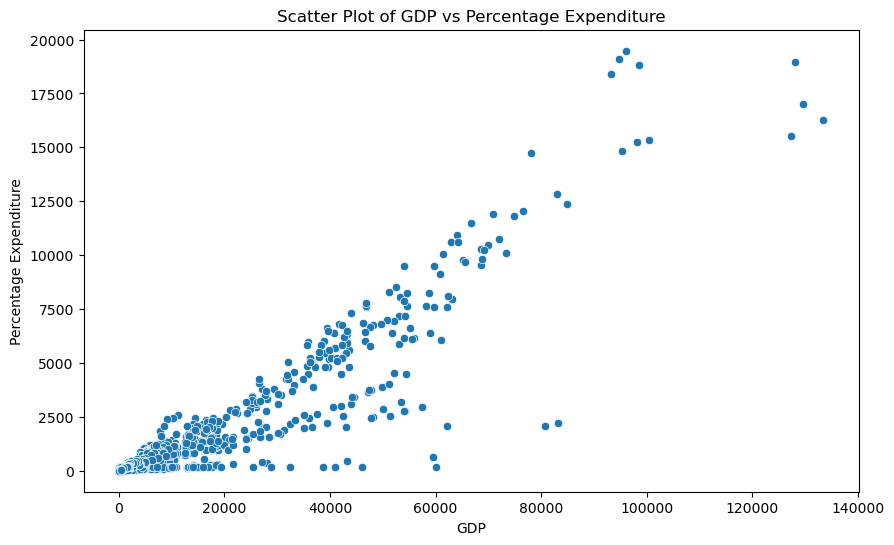

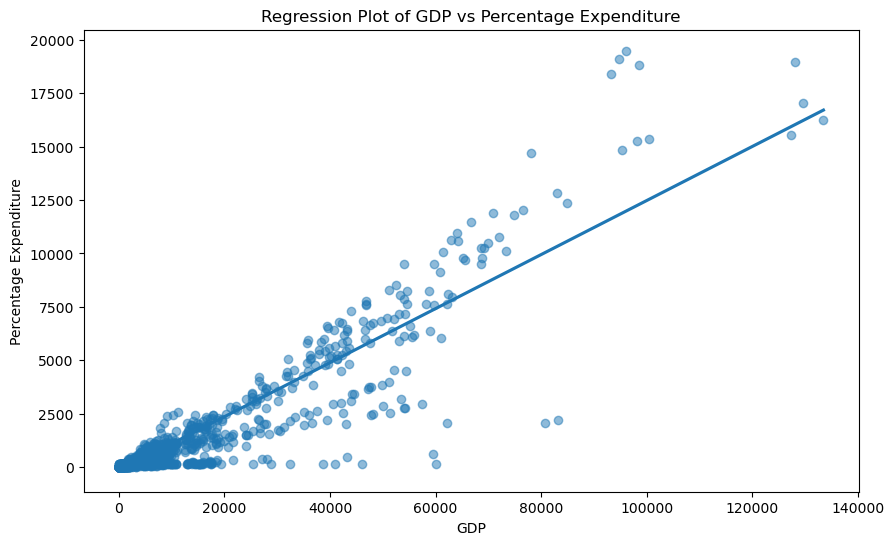

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'health_train'
# with 'PercentageExpenditure' and 'GDP' columns.

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=health_train, x='GDP', y='PercentageExpenditure')
plt.title('Scatter Plot of GDP vs Percentage Expenditure')
plt.xlabel('GDP')
plt.ylabel('Percentage Expenditure')
plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=health_train, x='GDP', y='PercentageExpenditure', ci=None, scatter_kws={'alpha': 0.5})
plt.title('Regression Plot of GDP vs Percentage Expenditure')
plt.xlabel('GDP')
plt.ylabel('Percentage Expenditure')
plt.show()
